In [1]:
from mt_rent_statement import *

### Load data

In [2]:
start='2025-01-01'
end='2025-01-31'
dfT=load_tenancies('all_tenancies.xls')
dfAll=load_data(start,end)
dfAll.head(3)

WARNING *** file size (106483) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
Reading file: J://My Drive//NAS//My Documents//Business//Property//Statements//working//python//data//property//checked//JAN2025_codedAndCategorised.xlsx


,Account,Amount,Subcategory,Memo,Property,Description,Cat,Subcat
2025-01-01,60-83-71 00558156,-465.0,REPAIRS_AND_MAINTENANCE,Alhambra Road M Tucker SC,NaN,NaN,ServiceCharge,NaN
2025-01-01,60-83-71 00558156,-315.0,REPAIRS_AND_MAINTENANCE,ALHHAMBRA ROAD M Tucker SC,NaN,NaN,ServiceCharge,NaN
2025-01-01,60-83-71 00558156,-320.0,REPAIRS_AND_MAINTENANCE,Alhambra Road M Tucker SC,NaN,NaN,ServiceCharge,NaN


### Rent Statement

In [3]:
paidinadvancelist = ['Peter Gradon (28/02/2018)','Camilla Bailey & Michael Gregson (31/08/2023)','Charlotte McLellan-Campbell & Jose Gongora Oliva (10/09/2023)']
inarrearslist = ['Mark Williams (25/09/2019)']
dfRs=get_rent_statement(dfAll, dfT, start, end, inarrearslist, paidinadvancelist)
dfRs=dfRs.round(0)
#dfRs.sort_values(by=['Net'], ascending=False).style.apply(custom_style, axis=1)
#dfRs.sort_values(by=['Bills'], ascending=True).style.apply(custom_style, axis=1)
num_cols = dfRs.select_dtypes(include=["number"]).columns
dfRs.style.format({c: "{:.0f}" for c in num_cols}).apply(custom_style, axis=1)

,Tenant,Agent,Received,Bills,Mortgage,Net,Status
Property,,,,,,,
321 London Rd,,,0,-92,0,-92,
Flat 1 - 321 London Rd,Ruksana Akter Chowdhury (09/08/2023),None,725,-203,-463,59,Paid
Flat 2 - 321 London Rd,Cipran Georgescu (18/01/2020),None,750,0,-441,309,Paid
Flat 3 - 321 London Rd,Holman & Wolfe (28/12/2023),None,1050,0,-380,670,Paid
Flat 4 - 321 London Rd,Chloe Freshney & Harry Aldingtons (31/01/2023),None,725,0,-463,262,Paid
169 Fawcett Rd,,,0,0,0,0,
Flat 1 - 169 Fawcett Rd,Susan Parkinson (06/11/2016),Beals,675,0,-417,258,Paid
Flat 2 - 169 Fawcett Rd,Vaclav Hajek (10/08/2019),None,1550,-50,-378,1122,Paid
Flat 3 - 169 Fawcett Rd,August John (14/05/2022),None,750,-66,-443,241,Paid


Notes:


### Income/Expenditure per Property

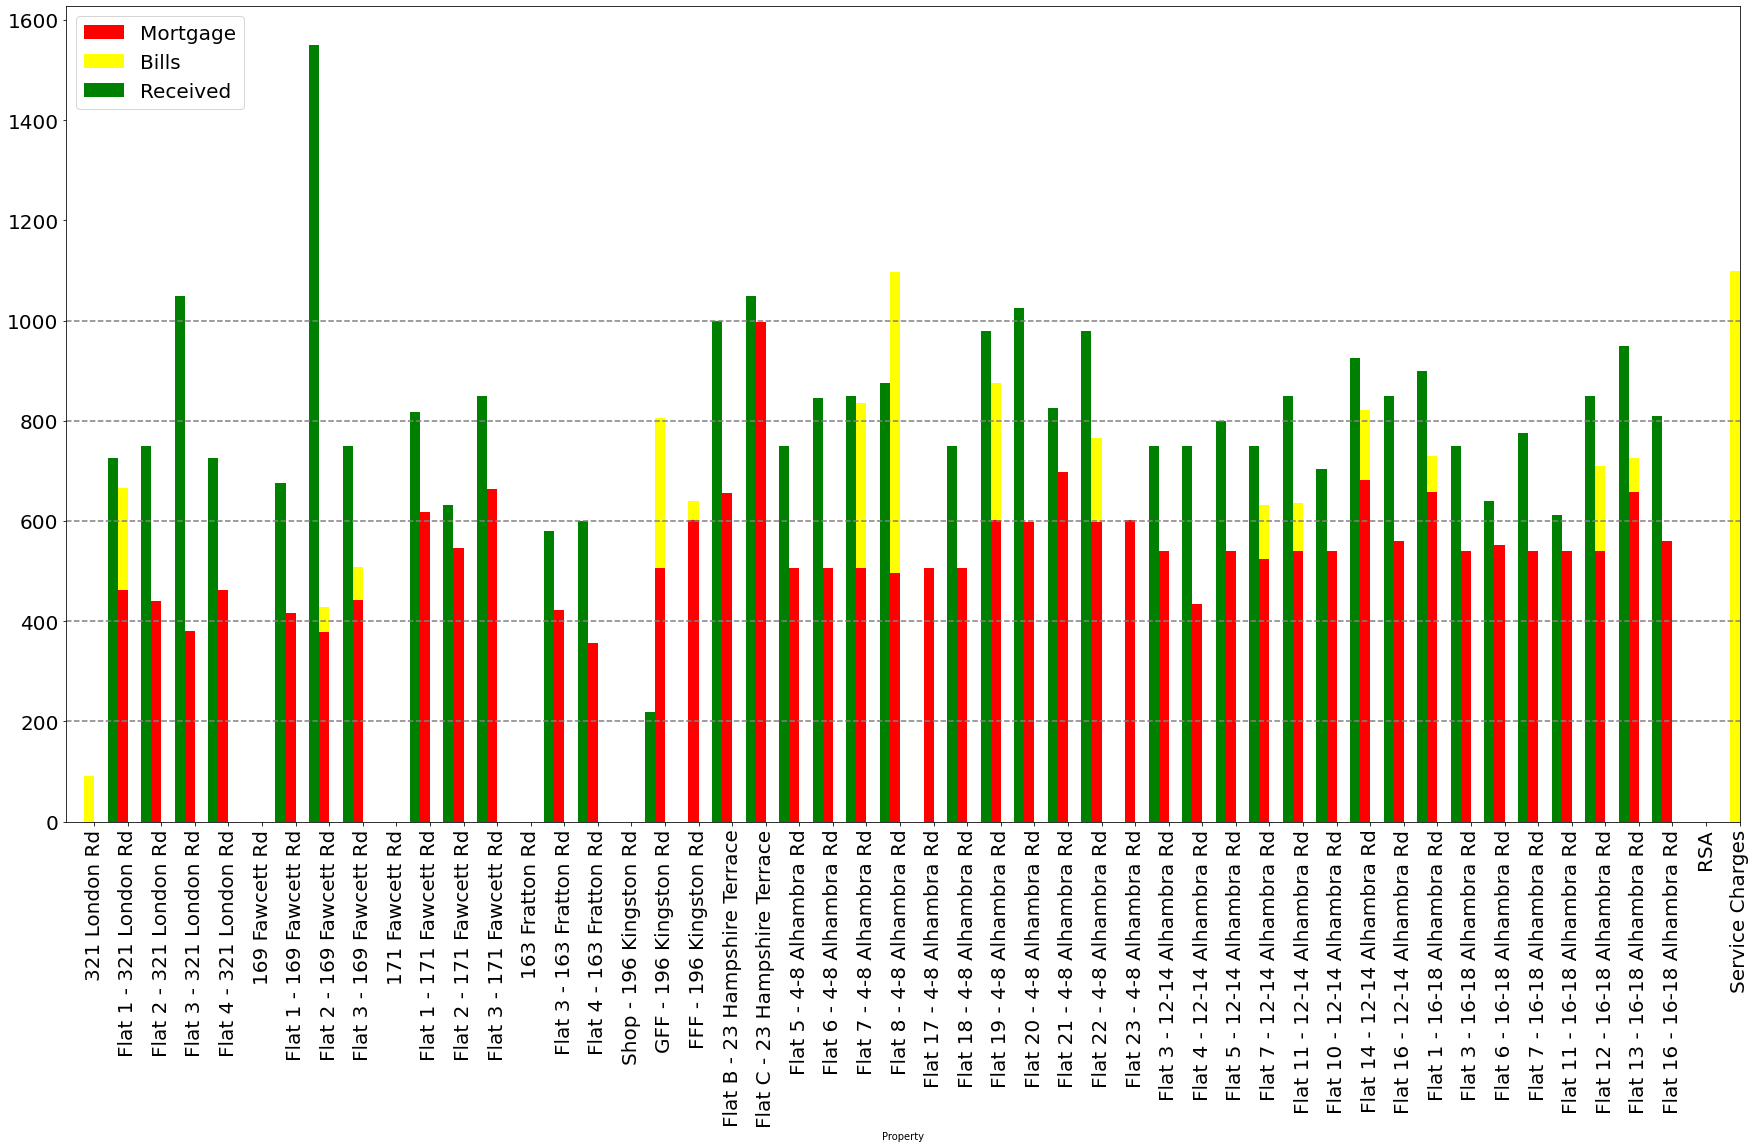

In [4]:
plot_income_expenditure_per_property(dfRs[:-1])

### Net Income Per Property

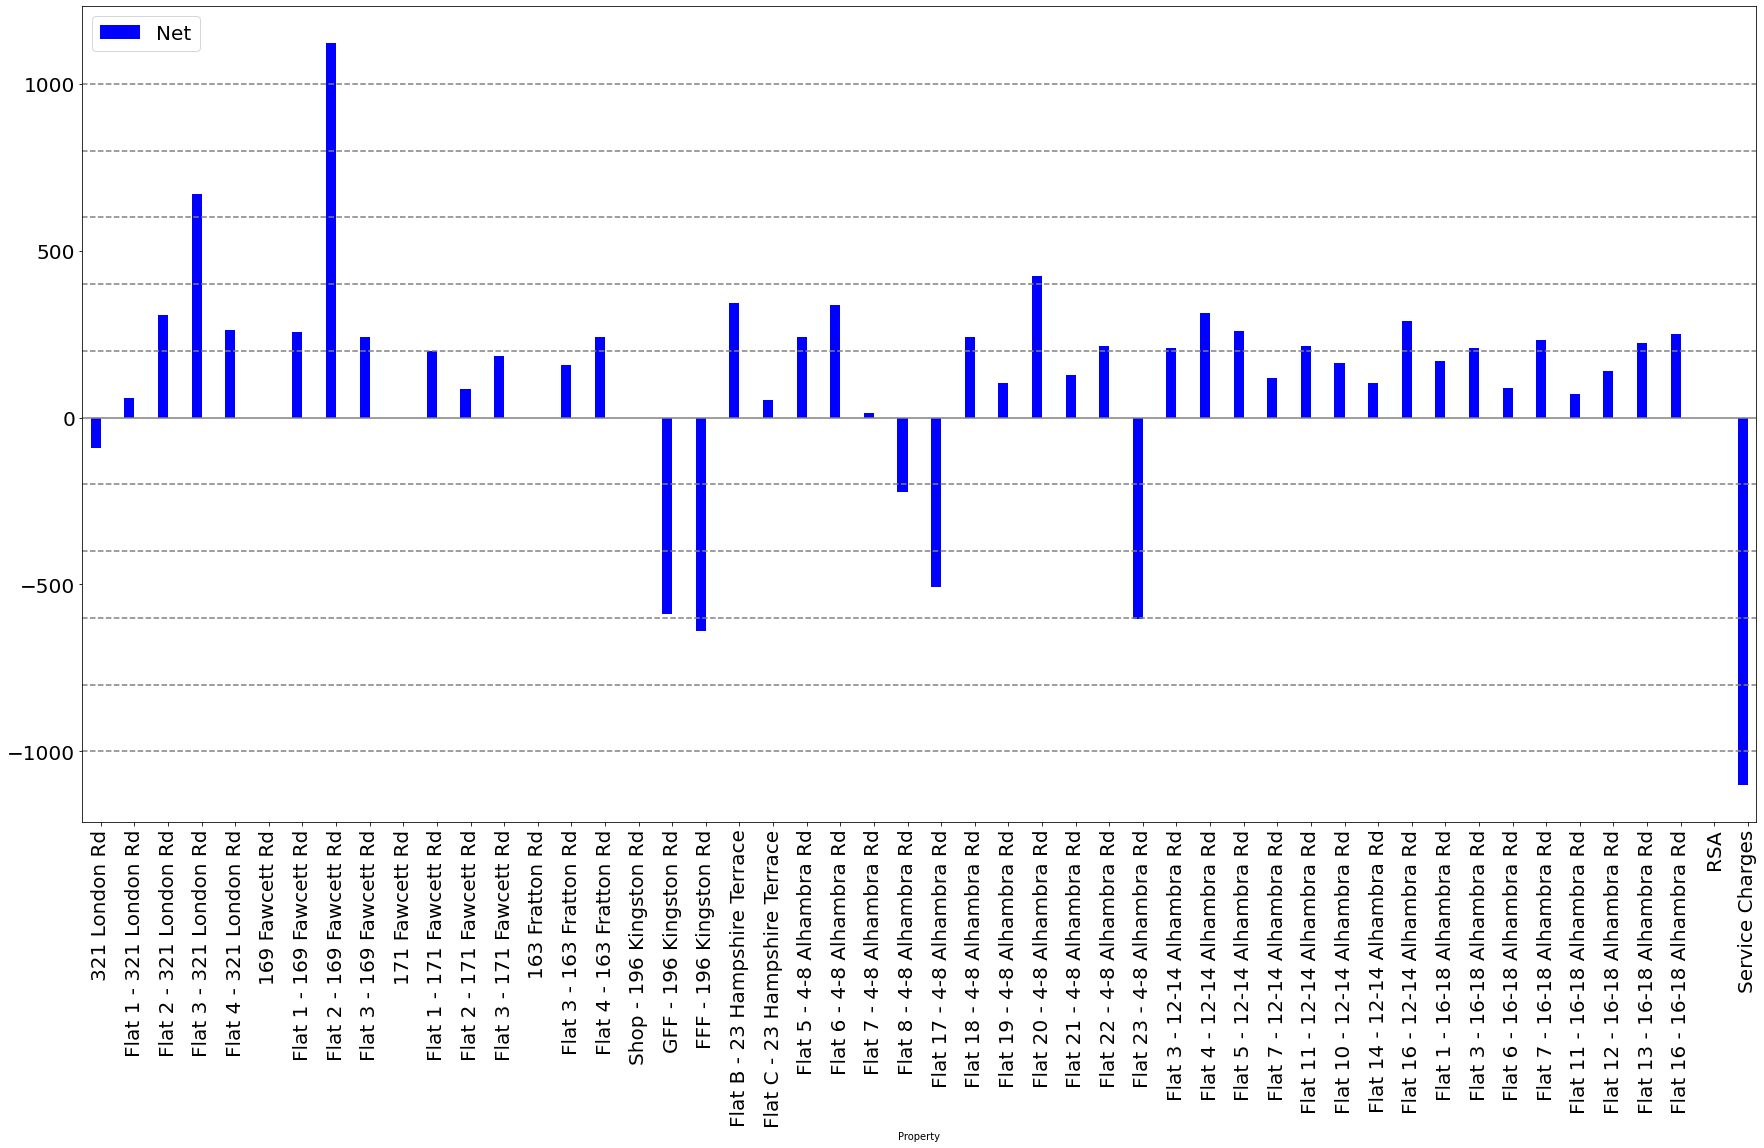

In [5]:
plot_net_income(dfRs[:-1])

### Accounts Check
Check Drawings against expenses

In [6]:
dfAll[(dfAll.Cat=='RegularPayment')|(dfAll.Cat=='PersonalExpense')|(dfAll.Cat=='Hilltop')|(dfAll.Cat=='HMRCDD')|(dfAll.Cat=='Drawings')|(dfAll.Cat=='SchoolFee')].groupby(['Cat']).sum()

,Amount,Description
Cat,,
Hilltop,-300.00,0.0
PersonalExpense,-4282.77,0.0
RegularPayment,-1409.26,0.0
SchoolFee,-2806.68,0.0


In [19]:
grp = dfAll.groupby(['Account', 'Cat']).sum()
num_cols = grp.select_dtypes(include='number').columns
grp.style \
   .format({c: "{:.0f}" for c in num_cols}) \
   .apply(custom_style_accounts_cat, axis=1)

#### Mortgage check
Check mortgages refunded from business account

In [8]:
dfMtg=dfAll[((dfAll.Cat=='Mortgage')|(dfAll.Cat=='MortgageRefund'))&(dfAll.Account!='60-83-71 00558156')].groupby(['Account','Cat']).Amount.sum()
dfMtg=dfMtg.reset_index().pivot('Account','Cat')
dfMtg.columns=dfMtg.columns.get_level_values(1)
if('MortgageRefund' not in dfMtg.columns):
    dfMtg['MortgageRefund']=0
dfMtg['Diff']=dfMtg.Mortgage + dfMtg.MortgageRefund
dfMtg

Cat,Mortgage,MortgageRefund,Diff
Account,,,
20-53-97 30728691,-23449.59,0,-23449.59


In [9]:
dfMtg['Diff'].sum()

-23449.590000000004

#### Rent check
Rents going to wrong account

In [10]:
dfAll.loc[(dfAll.Account!='60-83-71 00558156')&(dfAll.Cat=='OurRent')]

,Account,Amount,Subcategory,Memo,Property,Description,Cat,Subcat


In [11]:
dfAll.loc[(dfAll.Account!='60-83-71 00558156')&(dfAll.Cat=='OurRent')].groupby(['Cat']).sum()

,Amount,Description
Cat,,


#### Property expense check
Property expenses and service charges taken from 3072 or 6045

In [12]:
dfAll.loc[(dfAll.Account!='60-83-71 00558156')&(dfAll.Cat=='PropertyExpense')]

,Account,Amount,Subcategory,Memo,Property,Description,Cat,Subcat
2025-01-03,20-74-09 60458872,15.0,Credit,SSE SOUTHERN E 6882766014 REV1114Pa,169FAW,NaN,PropertyExpense,NaN
2025-01-03,20-74-09 60458872,-15.0,Standing Order,SSE SOUTHERN ELECT 6882766014 STO,169FAW,NaN,PropertyExpense,NaN
2025-01-31,20-74-09 60458872,15.0,Credit,SSE SOUTHERN E 6882766014 REV1114Pa,169FAW,NaN,PropertyExpense,NaN
2025-01-31,20-74-09 60458872,-15.0,Standing Order,SSE SOUTHERN ELECT 6882766014 STO,169FAW,NaN,PropertyExpense,NaN


In [13]:
dfAll.loc[(dfAll.Account!='60-83-71 00558156')&(dfAll.Cat=='PropertyExpense')].groupby(['Cat']).sum()

,Amount,Description
Cat,,
PropertyExpense,0.0,0.0


In [14]:
dfAll.loc[(dfAll.Account!='60-83-71 00558156')&(dfAll.Cat=='ServiceCharge')]

,Account,Amount,Subcategory,Memo,Property,Description,Cat,Subcat


In [15]:
dfAll.loc[(dfAll.Account!='60-83-71 00558156')&(dfAll.Cat=='ServiceCharge')].groupby(['Cat']).sum()

,Amount,Description
Cat,,
